# Sensor point calculations 

for generating the sensor point matrix for all polygon type objects 

### TODO:

- [ ] fix point interpolation (quirk at 9)
- [ ] implement polygon bounding for required points within it 
- [ ] save down to mySQL


In [1]:
import folium as f 
import kml_parser_functs as kml
import map_functs as mf 
import math 
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
import matrixmath as mm 

In [2]:
filename = 'GoogleEarth_KML/Bodium_Vineyard.kml'

In [3]:

name,lookat, features = kml.parse_KML(filename)



feature = features[0]
print(name)

Bodium_Vineyard


In [4]:
def rotate(origin, point, angle):
    ox, oy = origin
    px, py = point

    qx = ox + math.cos(angle) * (px - ox) - math.sin(angle) * (py - oy)
    qy = oy + math.sin(angle) * (px - ox) + math.cos(angle) * (py - oy)
    return qx, qy

In [5]:

    
mr =  mm.get_matrix(feature.coords,feature.limits,feature.matrix_res,feature.midpoint,feature.crop_bearing)

(51.00376614704298, 0.5441363333014304)
(51.00380313544429, 0.5442743758943909)
(51.00384012384559, 0.5444124184873514)
(51.0038771122469, 0.5445504610803119)
(51.0039141006482, 0.5446885036732724)
(51.00395108904951, 0.5448265462662328)
(51.00398807745081, 0.5449645888591933)
(51.00402506585212, 0.5451026314521539)
(51.004062054253424, 0.5452406740451143)
(51.00409904265473, 0.5453787166380748)
(51.00413603105603, 0.5455167592310353)
(51.00417301945733, 0.5456548018239957)
(51.00421000785864, 0.5457928444169563)
(51.004246996259944, 0.5459308870099168)
(51.00428398466125, 0.5460689296028772)
(51.004320973062555, 0.5462069721958377)
(51.00435796146386, 0.5463450147887982)
(51.004394949865166, 0.5464830573817587)
(51.00382826186886, 0.544119689683999)
(51.00386525027017, 0.5442577322769595)
(51.00390223867147, 0.5443957748699201)
(51.00393922707278, 0.5445338174628805)
(51.00397621547408, 0.544671860055841)
(51.00401320387539, 0.5448099026488015)
(51.004050192276694, 0.5449479452417619)

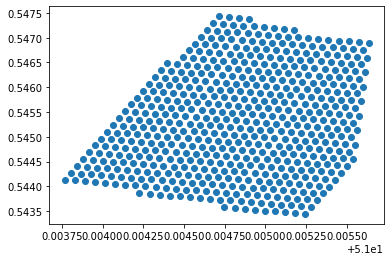

In [6]:
import matplotlib.pyplot as plt
import numpy as np

x = []
y = []
for p in mr: 

    x.append(p[0])
    y.append(p[1])
    print(p)

    
xr = np.array(x)
yr = np.array(y)
plt.scatter(x, y)


plt.show()

In [7]:

testcoords = features[0].coords

x = []
y = []

for coord in testcoords:
    x.append(coord[1])
    y.append(coord[0])
    

poly_x = np.array(x)
poly_y = np.array(y)




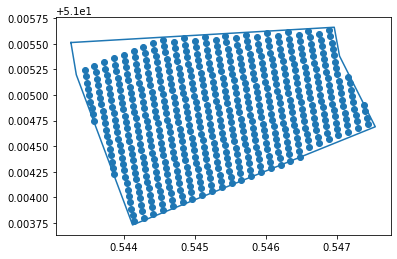

In [8]:

plt.plot(poly_x,poly_y)
plt.scatter(yr, xr)
plt.show()


In [9]:
testcoords

[[51.00551148675169, 0.5432519630088373],
 [51.00519707830968, 0.5433278022626542],
 [51.00373157396675, 0.5441204659816967],
 [51.00468954312075, 0.5475393292600583],
 [51.00537919925254, 0.5470359303678474],
 [51.00566075395709, 0.5469611438889976],
 [51.00551148675169, 0.5432519630088373]]

In [10]:
poly = Polygon(testcoords)

In [11]:
op_matrix = []
for mp in mr:
    p = Point(mp[0],mp[1])
    if p.within(poly):
        op_matrix.append(mp)


x = []
y = []

for coord in op_matrix:
    x.append(coord[1])
    y.append(coord[0])
    

op_x = np.array(x)
op_y = np.array(y)


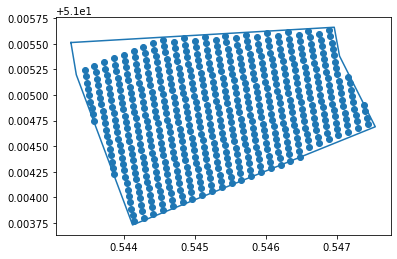

In [12]:
plt.plot(poly_x,poly_y)
plt.scatter(op_x, op_y)
plt.show()

In [13]:
len(op_y)

561

In [14]:
import matrixmath as mm

In [15]:
print(feature)

Field 1 - white_grape


In [16]:
feature.matrix_coords = mm.calc_matrix(feature.limits,feature.matrix_res,feature.midpoint,feature.crop_bearing)

feature.matrix_coords



[(51.003307619308394, 0.543667381016743),
 (51.0033446077097, 0.5438054236097035),
 (51.003381596111005, 0.543943466202664),
 (51.00341858451231, 0.5440815087956244),
 (51.003455572913616, 0.5442195513885849),
 (51.00349256131492, 0.5443575939815454),
 (51.00352954971623, 0.544495636574506),
 (51.00356653811753, 0.5446336791674664),
 (51.00360352651884, 0.5447717217604269),
 (51.00364051492014, 0.5449097643533873),
 (51.00367750332145, 0.5450478069463478),
 (51.003714491722754, 0.5451858495393084),
 (51.00375148012406, 0.5453238921322688),
 (51.003788468525364, 0.5454619347252293),
 (51.00382545692666, 0.5455999773181898),
 (51.00386244532797, 0.5457380199111502),
 (51.00389943372927, 0.5458760625041108),
 (51.00393642213058, 0.5460141050970713),
 (51.003973410531884, 0.5461521476900317),
 (51.00401039893319, 0.5462901902829922),
 (51.004047387334495, 0.5464282328759527),
 (51.0040843757358, 0.5465662754689132),
 (51.004121364137106, 0.5467043180618737),
 (51.00415835253841, 0.54684236

In [17]:
def check_within_poly(coords, matrix_coords):
    poly = Polygon(coords)

    op_matrix = []
    for matrix_point in matrix_coords:
        p = Point(matrix_point[0],matrix_point[1])
        if p.within(poly):
            op_matrix.append(matrix_point)

    return op_matrix


OP_matrix = check_within_poly(feature.coords, feature.matrix_coords)
            
x = []
y = []

for coord in OP_matrix:
    x.append(coord[1])
    y.append(coord[0])


op_x = np.array(x)
op_y = np.array(y)

In [18]:
len(op_x)

561

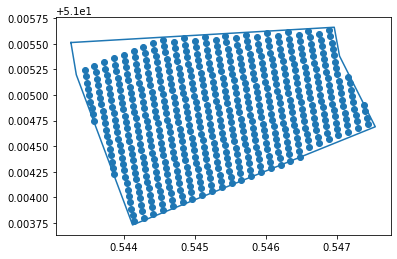

In [19]:
plt.plot(poly_x,poly_y)
plt.scatter(op_x, op_y)
plt.show()

In [20]:
OP_matrix = mm.check_within_poly(feature.coords,mm.calc_matrix(feature.limits,feature.matrix_res,feature.midpoint,feature.crop_bearing))

In [21]:
OP_matrix = mm.get_matrix(feature.coords,feature.limits,feature.matrix_res,feature.midpoint,feature.crop_bearing)

In [22]:
len(mm.get_matrix(feature.coords,feature.limits,feature.matrix_res,feature.midpoint,feature.crop_bearing))

561

In [23]:
len(feature.matrix_coords)

961

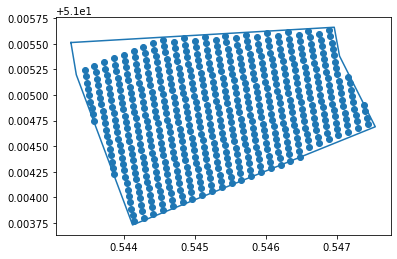

In [24]:
x = []
y = []

for coord in OP_matrix:
    x.append(coord[1])
    y.append(coord[0])


op_x = np.array(x)
op_y = np.array(y)

plt.plot(poly_x,poly_y)
plt.scatter(op_x, op_y)
plt.show() 

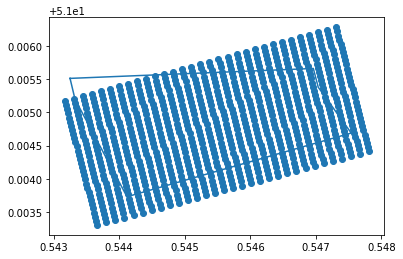

In [25]:
feature = features[0]



objx = []
objy = []

for coord in feature.matrix_coords:
    objx.append(coord[1])
    objy.append(coord[0])


op_x = np.array(objx)
op_y = np.array(objy)

plt.plot(poly_x,poly_y)
plt.scatter(op_x, op_y)
plt.show()

(51.00395108904951, 0.5448265462662328)


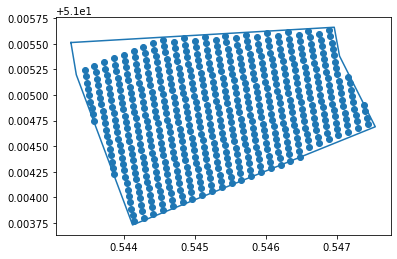

In [28]:
feature = features[0]

feature.calc_matrix()




print(feature.matrix_coords[5])
objx = []
objy = []

for coord in feature.matrix_coords:
    objx.append(coord[1])
    objy.append(coord[0])


op_x = np.array(objx)
op_y = np.array(objy)

plt.plot(poly_x,poly_y)
plt.scatter(op_x, op_y)
plt.show()